# Date-A-Scientist Machine Learning Project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

## 1. Data Import

In [2]:
#Create your df here:
profiles = pd.read_csv("profiles.csv")

display(profiles.sample(), "Null Values", profiles.isnull().sum(), profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
12409,27,average,NaN,rarely,sometimes,working on med school,"so yeah, neuroscience and drawing? people like...",i am in the process of applying for medical sc...,braaaaaaaaaaaaains!!!<br />\n<br />\n....yeah....,braaaaaaaaaaaaains!!!<br />\n<br />\n....yeah....,"books i have enjoyed: sybil, demian, anything ...",braaaaains - always need to keep learning and ...,uhh... i think you can guess what i would writ...,"cooking with my husband, hanging out with frie...",i work too much. i'm also very much type a but...,"you can communicate honestly, effectively, and...",NaN,62.0,-1,science / tech / engineering,2011-12-05-18-08,"san francisco, california",NaN,bisexual,has cats,atheism and laughing about it,f,cancer but it doesn&rsquo;t matter,no,"english (fluently), french (fluently), other (...",married


'Null Values'

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

None

## 2. Data Exploration, Profiling & Feature Inspection

In [3]:
# Split dataset into multiple choice and long-form answers
# multiple choice columns from the dataset
categorical_columns = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',\
              'height', 'income', 'job', 'offspring', 'orientation', 'pets', 'religion',\
              'sex', 'sign', 'smokes', 'speaks', 'status']

# long form answer questions
lf_columns= [col_name for col_name in profiles.columns if 'essay' in col_name]

In [4]:
# Explore select multiple choice features

for feature in categorical_columns:
    print(feature.upper(),"\n")
    print('- - - - - - - - - - -\n','- - - - - - - - - - -')
    display(profiles[feature].value_counts().reset_index())

BODY_TYPE 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,body_type
0,average,14652
1,fit,12711
2,athletic,11819
3,thin,4711
4,curvy,3924
5,a little extra,2629
6,skinny,1777
7,full figured,1009
8,overweight,444
9,jacked,421


DIET 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,diet
0,mostly anything,16585
1,anything,6183
2,strictly anything,5113
3,mostly vegetarian,3444
4,mostly other,1007
5,strictly vegetarian,875
6,vegetarian,667
7,strictly other,452
8,mostly vegan,338
9,other,331


DRINKS 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,drinks
0,socially,41780
1,rarely,5957
2,often,5164
3,not at all,3267
4,very often,471
5,desperately,322


DRUGS 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,drugs
0,never,37724
1,sometimes,7732
2,often,410


EDUCATION 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,education
0,graduated from college/university,23959
1,graduated from masters program,8961
2,working on college/university,5712
3,working on masters program,1683
4,graduated from two-year college,1531
5,graduated from high school,1428
6,graduated from ph.d program,1272
7,graduated from law school,1122
8,working on two-year college,1074
9,dropped out of college/university,995


ETHNICITY 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,ethnicity
0,white,32831
1,asian,6134
2,hispanic / latin,2823
3,black,2008
4,other,1706
...,...,...
212,"middle eastern, indian, white",1
213,"asian, middle eastern, black, white, other",1
214,"asian, middle eastern, indian, hispanic / lati...",1
215,"black, native american, indian, pacific island...",1


HEIGHT 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,height
0,70.0,6074
1,68.0,5449
2,67.0,5354
3,72.0,5315
4,69.0,5179
5,71.0,4826
6,66.0,4759
7,64.0,3865
8,65.0,3794
9,73.0,2815


INCOME 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,income
0,-1,48442
1,20000,2952
2,100000,1621
3,80000,1111
4,30000,1048
5,40000,1005
6,50000,975
7,60000,736
8,70000,707
9,150000,631


JOB 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,job
0,other,7589
1,student,4882
2,science / tech / engineering,4848
3,computer / hardware / software,4709
4,artistic / musical / writer,4439
5,sales / marketing / biz dev,4391
6,medicine / health,3680
7,education / academia,3513
8,executive / management,2373
9,banking / financial / real estate,2266


OFFSPRING 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,offspring
0,doesn&rsquo;t have kids,7560
1,"doesn&rsquo;t have kids, but might want them",3875
2,"doesn&rsquo;t have kids, but wants them",3565
3,doesn&rsquo;t want kids,2927
4,has kids,1883
5,has a kid,1881
6,"doesn&rsquo;t have kids, and doesn&rsquo;t wan...",1132
7,"has kids, but doesn&rsquo;t want more",442
8,"has a kid, but doesn&rsquo;t want more",275
9,"has a kid, and might want more",231


ORIENTATION 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,orientation
0,straight,51606
1,gay,5573
2,bisexual,2767


PETS 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,pets
0,likes dogs and likes cats,14814
1,likes dogs,7224
2,likes dogs and has cats,4313
3,has dogs,4134
4,has dogs and likes cats,2333
5,likes dogs and dislikes cats,2029
6,has dogs and has cats,1474
7,has cats,1406
8,likes cats,1063
9,has dogs and dislikes cats,552


RELIGION 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,religion
0,agnosticism,2724
1,other,2691
2,agnosticism but not too serious about it,2636
3,agnosticism and laughing about it,2496
4,catholicism but not too serious about it,2318
5,atheism,2175
6,other and laughing about it,2119
7,atheism and laughing about it,2074
8,christianity,1957
9,christianity but not too serious about it,1952


SEX 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,sex
0,m,35829
1,f,24117


SIGN 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,sign
0,gemini and it&rsquo;s fun to think about,1782
1,scorpio and it&rsquo;s fun to think about,1772
2,leo and it&rsquo;s fun to think about,1692
3,libra and it&rsquo;s fun to think about,1649
4,taurus and it&rsquo;s fun to think about,1640
5,cancer and it&rsquo;s fun to think about,1597
6,pisces and it&rsquo;s fun to think about,1592
7,sagittarius and it&rsquo;s fun to think about,1583
8,virgo and it&rsquo;s fun to think about,1574
9,aries and it&rsquo;s fun to think about,1573


SMOKES 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,smokes
0,no,43896
1,sometimes,3787
2,when drinking,3040
3,yes,2231
4,trying to quit,1480


SPEAKS 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,speaks
0,english,21828
1,english (fluently),6628
2,"english (fluently), spanish (poorly)",2059
3,"english (fluently), spanish (okay)",1917
4,"english (fluently), spanish (fluently)",1288
...,...,...
7642,"english (fluently), urdu (poorly), japanese (p...",1
7643,"english, spanish, hindi, c++",1
7644,"english (fluently), japanese (okay), thai (oka...",1
7645,"english (fluently), french (okay), italian (ok...",1


STATUS 

- - - - - - - - - - -
 - - - - - - - - - - -


,index,status
0,single,55697
1,seeing someone,2064
2,available,1865
3,married,310
4,unknown,10


### 2a. Feature Engineering: Categorical Data Mapping

In [5]:
# Let's map categorical columns into useful numerical data
# profiles.drinks.unique()
# profiles.smokes.unique()
# profiles.drugs.unique()
drink_map= {'not at all': 0, 'rarely': 1, 'socially': 2,
                'often': 3, 'very often': 4, 'desperately': 5}

smoking_map= {'no': 0, 'trying to quit': 1, 'sometimes': 2, 'when drinking': 3, 'yes': 4}

drug_map= {'never': 0, 'sometimes': 1, 'often': 2}

# create numerical columns, convert them from float data-type to integer
profiles['drink_code']= profiles.drinks.map(drink_map).convert_dtypes(convert_integer=True)
profiles['smoke_code']= profiles.smokes.map(smoking_map).convert_dtypes(convert_integer=True)
profiles['drug_code']= profiles.drugs.map(drug_map).convert_dtypes(convert_integer=True)

# Clean up the sign column
profiles['sign_clean']= profiles.sign.apply(lambda x: str(x).split(' ',1)[0])
# convert string 'nan' to null values
profiles['sign_clean']= profiles.sign_clean.apply(lambda x: np.nan if x=='nan' else x)


# import csv file with education mapping
educ_map= pd.read_csv('education_map.csv')

# map education data to pre-determined categories
profiles['education_map']= profiles['education'].apply(lambda x:
                                                educ_map[educ_map.Feature_Data == x].Target_Mapping.values[0]\
                        if not educ_map[educ_map.Feature_Data == x].Target_Mapping.values.size == 0 else pd.NA)
# map education data to pre-determined codes
profiles['education_code']= profiles['education'].apply(lambda x:
                                                educ_map[educ_map.Feature_Data == x].Map_No.values[0]\
                        if not educ_map[educ_map.Feature_Data == x].Map_No.values.size == 0 else pd.NA)

# validate: preview mapping
display(
    profiles[['drinks','drink_code']].value_counts().reset_index().sort_values('drink_code'),
    profiles[['smokes','smoke_code']].value_counts().reset_index().sort_values('smoke_code'),
    profiles[['drugs','drug_code']].value_counts().reset_index().sort_values('drug_code'),
    profiles[['education','education_map', 'education_code']].value_counts().reset_index().sort_values('education_code')
)

,drinks,drink_code,0
3,not at all,0,3267
1,rarely,1,5957
0,socially,2,41780
2,often,3,5164
4,very often,4,471
5,desperately,5,322


,smokes,smoke_code,0
0,no,0,43896
4,trying to quit,1,1480
1,sometimes,2,3787
2,when drinking,3,3040
3,yes,4,2231


,drugs,drug_code,0
0,never,0,37724
1,sometimes,1,7732
2,often,2,410


,education,education_map,education_code,0
15,working on space camp,No high school diploma or equivalent,0,445
13,dropped out of space camp,No high school diploma or equivalent,0,523
25,working on high school,No high school diploma or equivalent,0,87
23,dropped out of high school,No high school diploma or equivalent,0,102
26,space camp,Professional Training,1,58
12,graduated from space camp,Professional Training,1,657
19,dropped out of two-year college,High school diploma or equivalent,2,191
5,graduated from high school,High school diploma or equivalent,2,1428
24,high school,High school diploma or equivalent,2,96
9,dropped out of college/university,High school diploma or equivalent,2,995


### 2b. Feature Engineering: Non-Categorical Data

In [6]:
import string
import re

# Let's create a column that drops null values and conccatenates all word/letters in the essay columns
all_essays= profiles[lf_columns].replace(np.nan,'', regex= True).\
            apply(lambda x: ' '.join(x), axis=1)

# create column to capture word length
profiles['essay_len']= all_essays.apply(lambda x: len(x))


# function returns the average word length in a given sentence
def average_word_length(sentence):
    if not isinstance(sentence, str) or not sentence.strip():
        return 0  # Return 0 for non-string or empty sentences
    
    # Remove punctuation using str.translate
    translator = str.maketrans('', '', string.punctuation)
    cleaned_sentence = sentence.translate(translator)
    
    # Split the sentence into words
    words = cleaned_sentence.split()
    
    if not words:
        return 0  # Avoid division by zero
    
    # Calculate the total length of all words
    total_length = sum(len(word) for word in words)
    
    # Calculate the average word length
    average_length = total_length / len(words)
    
    return average_length

# function returns the count of a *list of substrings* from a sentence: matches whole substrings not partial substrings
def substr_freq(sentence, substr=[]):
    counter= len(substr)
    substr_cnt= 0
    for i in range(counter):
        pattern = re.compile(rf'\b{re.escape(substr[i])}\b', re.IGNORECASE)
        substr_cnt+= len(pattern.findall(sentence))
    return substr_cnt

# create column to capture average word length
profiles['essay_avg']= all_essays.apply(average_word_length)

# create column to capture frequency of the words 'I' and "Me": not case sensitive
profiles['essay_freq']= all_essays.apply(lambda x: substr_freq(x, ['I','me']))

# validate: preview numerical columns
profiles[[col_name for col_name in profiles.columns if 'essay' in col_name]].sample(3)

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,essay_len,essay_avg,essay_freq
42942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,if you are ready to take a backpack and travel...,84,3.411765,0
5535,i'm a huge music lover/listener/maker. i'm kin...,my 11+ year long career working in human servi...,- calming people down<br />\n- trivia of all s...,"my height. but, the best part about being tall...","authors - flannery o'conner, shirley jackson, ...",NaN,"set lists for my next radio show, dj gig or mi...",probably at an oldies dj night hitting people ...,i went to therapy for about 6 years. i stopped...,"if you think you can keep up, if you feel like...",3685,4.270186,37
4909,"i am fun,smart and crazy.i like to talk about ...",living it.,making smoothies.,my hair.,NaN,NaN,the economy of this country.,tango,i don't sleep very much,you like to meet in person.,204,4.388889,3


## 3. Visualizing Features

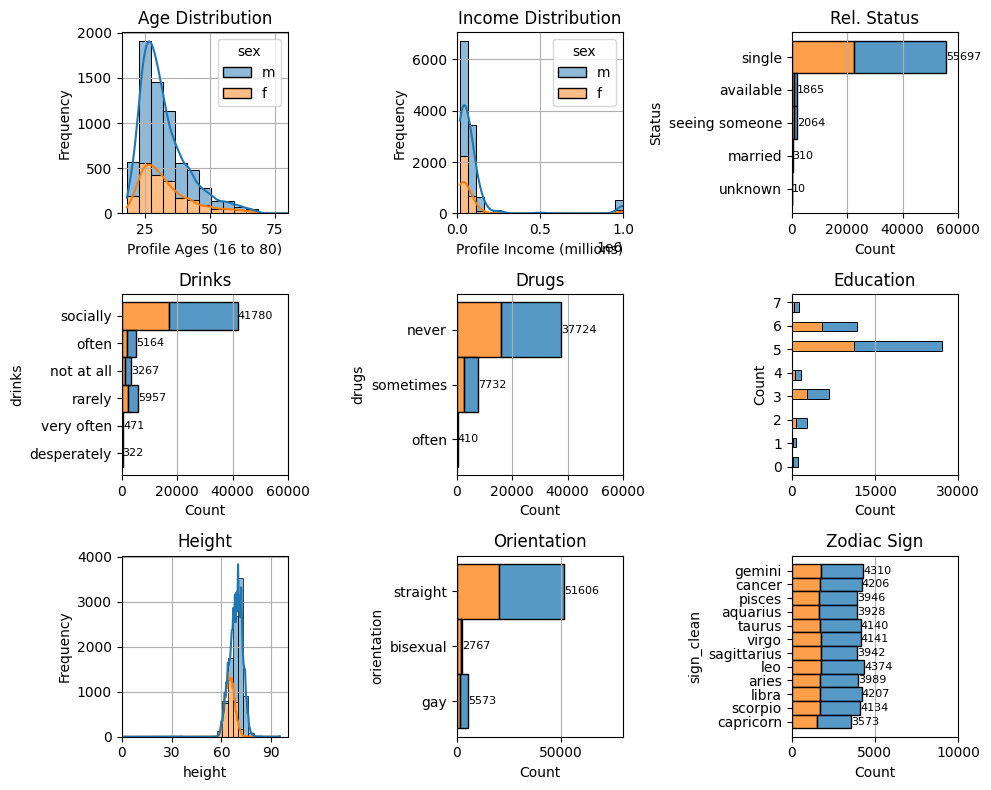

In [7]:
# Visualizing features
fig, ax= plt.subplots(nrows=3, ncols=3, figsize= (10,8))
sns.histplot(data= profiles, x= "age", stat= "frequency", bins= 20, hue= "sex", multiple= "stack", kde= True, ax= ax[0][0]).\
            set(title= "Age Distribution", xlabel= "Profile Ages (16 to 80)", ylabel= "Frequency", xlim= (16,80))
ax[0][0].grid(True)

sns.histplot(data= profiles[(profiles.income> 0)], x= "income", hue= "sex", multiple= "stack", bins= 20, kde= True, ax= ax[0][1]).\
            set(title= "Income Distribution", xlabel= "Profile Income (millions)", ylabel= "Frequency", xlim= (0,1000000))
ax[0][1].grid(True)

sns.histplot(data= profiles, y= "status", hue= "sex", multiple= "stack", legend= False, ax= ax[0][2]).\
            set(title= "Rel. Status", xlabel= "Count", ylabel= "Status", xlim= (0, 60000))
ax[0][2].bar_label(ax[0][2].containers[1], fontsize= 8)
ax[0][2].grid(True, axis= 'x')

sns.histplot(data= profiles, y= "drinks", hue= "sex", multiple= "stack", legend= False, ax= ax[1][0]).\
            set(title= "Drinks", xlabel= "Count", xlim= (0, 60000))
ax[1][0].bar_label(ax[1][0].containers[1], fontsize= 8)
ax[1][0].grid(True, axis= 'x')

sns.histplot(data= profiles, y= "drugs", hue= "sex", multiple= "stack", legend= False, ax= ax[1][1]).\
            set(title= "Drugs", xlabel= "Count", xlim= (0, 60000))
ax[1][1].bar_label(ax[1][1].containers[1], fontsize= 8)
ax[1][1].grid(True, axis= 'x')

sns.histplot(data= profiles, y= "education_code", hue= "sex", multiple= "stack", legend= False, ax= ax[1][2]).\
            set(title= "Education", ylabel= "Count")
ax[1][2].set_yticks(np.arange(0, 8, 1))
ax[1][2].set_xticks(np.arange(0, 40001, 15000))
ax[1][2].grid(True, axis= 'x')

sns.histplot(data= profiles, x= "height", stat= "frequency", bins= 30, hue= "sex", multiple= "stack",kde= True, legend= False, ax= ax[2][0]).\
            set(title= "Height", ylabel= "Frequency", xlim= (1,100))
ax[2][0].set_xticks(np.arange(0, 101, 30))
ax[2][0].grid(True, which= 'both')

sns.histplot(data= profiles, y= "orientation", hue= "sex", multiple= "stack", legend= False, ax= ax[2][1]).\
            set(title= "Orientation", xlabel= "Count", xlim= (0, 80000))
ax[2][1].bar_label(ax[2][1].containers[1], fontsize= 8)
ax[2][1].grid(True, axis= 'x')

sns.histplot(data= profiles, y= "sign_clean", hue= "sex", multiple= "stack", legend= False, ax= ax[2][2]).\
            set(title= "Zodiac Sign", xlabel= "Count", xlim= (0, 10000))
ax[2][2].bar_label(ax[2][2].containers[1], fontsize= 8)
ax[2][2].grid(True, axis= 'x')

fig.tight_layout()

## 4. Making Product Increment Predictions Using Classifiers, Regressors & Decision Trees
- - - -
Using fine-tuned categortical and non-categorical data features, can we make product-related (dating-app centric) predictions using: 
* **k-NN (k-Nearest-Neighbors)** or,
* **Support Vector Machines** or,
* **Naive Bayes** or,
* **MultiLinear Regression** or,
* **Logistic Regression** or,
* **Random Forest Classifiers**

In this project, we'll look to answe the following questions using the classifiers above:\
a. **Can we predict users' zodiac `signs` using categorical data on social-vices and self-writing (`essay`) features?**\
b. **Can we predict users' `sex` with their `education` level and `income`?**

Next, we perform some feature engineering to make the data more suitable for predicting

### 4a. Predicting Zodiac Signs Using k-NN
---
In the context of k-nearest neighbors (k-NN), the choice of the parameter K plays a crucial role in determining the model's performance, particularly in terms of bias and variance, which are key components related to underfitting and overfitting.

**Understanding the K parameter in k-NN**

K represents the number of nearest neighbors the algorithm considers when making a prediction.\
**Low K (e.g., K=1):**\
**Pros:** Can capture fine-grained patterns in the data.\
**Cons:** Highly sensitive to noise and outliers, leading to potential overfitting.

**High K (e.g., K=20):**\
**Pros:** Provides a smoother, more generalized decision boundary, reducing sensitivity to noise.\
**Cons:** May oversimplify the model, potentially leading to underfitting.

**Bias-Variance Tradeoff:** Increasing K reduces the model's variance (less sensitive to training data) but increases its bias (less sensitive to the underlying patterns).

Can we predict a profile's zodiac sign using `drinking`, `smoking`, `drugs`, and `essays` as our k-NN features?

#### Feature Engineering and Scaling/Normalizing

In [9]:
# cleaned dataset to predict zodiac signs with: dropped null values
feature_data= profiles[['smoke_code', 'drink_code', 'drug_code', 'essay_len',\
                        'essay_avg', 'essay_freq', 'sign_clean']].dropna()

# map astrology signs to their start months
sign_map= {'capricorn':1, 'aquarius': 2, 'pisces': 3, 'aries': 4, 'taurus': 5, 'gemini': 6
          , 'cancer': 7, 'leo': 8, 'virgo': 9, 'libra': 10, 'scorpio': 11, 'sagittarius': 12}

data_labels= feature_data['sign_clean'].map(sign_map)

# scaled dataset to predict zodiac signs
X = feature_data[['smoke_code', 'drink_code', 'drug_code', 'essay_len', 'essay_avg', 'essay_freq']].values

# split data
from sklearn.model_selection import train_test_split

training_data, test_data, training_labels, test_labels = train_test_split(X,\
                                                        data_labels, test_size=0.2, random_state=42)
# apply min-max scaling transformation to data
min_max_scaler = MinMaxScaler()
X_train_scaled= min_max_scaler.fit_transform(training_data)
X_test_scaled= min_max_scaler.transform(test_data)

# visualize tabled data
pd.DataFrame(X_train_scaled, columns= feature_data.columns[:-1]).head(3)

,smoke_code,drink_code,drug_code,essay_len,essay_avg,essay_freq
0,0.00,0.4,0.0,0.000966,0.032710,0.008
1,1.00,0.4,0.5,0.007812,0.043337,0.018
2,0.75,0.4,0.5,0.005225,0.048653,0.000


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

# implement and iterate through k values to compare accuracy metrics
k = 200

# classification metric list for each value of k
acc_scores= list()
recall= list()
f1= list()


for i in range(1,k):
    # split data
    training_data, test_data,\
    training_labels, test_labels = train_test_split(X, data_labels, test_size=0.2, random_state=42)
    # apply min-max scaling transformation to data
    min_max_scaler = MinMaxScaler()
    X_train_scaled= min_max_scaler.fit_transform(training_data)
    X_test_scaled= min_max_scaler.transform(test_data)
    # split dataset into training and validation sets
    classifier= KNeighborsClassifier(n_neighbors= i)
    classifier.fit(X_train_scaled, training_labels)
    pred= classifier.predict(X_test_scaled)
    acc_scores.append(accuracy_score(test_labels, pred))
    recall.append(recall_score(test_labels, pred, average= 'weighted'))
    f1.append(f1_score(test_labels, pred, average= 'weighted'))
    
best_k= acc_scores.index(max(acc_scores))

print(f"The best K value is {best_k} with an accuracy of {max(acc_scores):.4f}%")

The best K value is 31 with an accuracy of 0.0893%


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf= KFold(n_splits=10, shuffle= True, random_state= 42)
av_acc_scores= cross_val_score(classifier, X, data_labels, cv=kf, scoring= 'accuracy')
av_f1_scores= cross_val_score(classifier, X, data_labels, cv=kf, scoring= 'f1_weighted')
av_recall_scores= cross_val_score(classifier, X, data_labels, cv=kf, scoring= 'recall_weighted')

print(f"Average Model Accuracy: {np.average(av_acc_scores).round(4)}+/-{np.std(av_acc_scores).round(4)}")
print(f"Average f1_score: {np.average(av_f1_scores).round(4)}+/-{np.std(av_f1_scores).round(4)}")
print(f"Average Recall score: {np.average(av_recall_scores).round(4)}+/-{np.std(av_recall_scores).round(4)}")

Average Model Accuracy: 0.0835+/-0.005
Average f1_score: 0.0812+/-0.0049
Average Recall score: 0.0835+/-0.005


#### Classification Metrics, Elbow-Plot: *K vs [Accuracy, Recall, f1_score]*
-- -- 
A *Confusion Matrix* provides a summary of prediction results on a classification problem.
* True Positives (TP): Correctly predicted positives.
* True Negatives (TN): Correctly predicted negatives.
* False Positives (FP): Incorrectly predicted positives.
* False Negatives (FN): Incorrectly predicted negatives.

*Classification Reports* include metrics such as precision, recall, f1-score, and support for each class/label.
* **Precision:** TP / (TP + FP) — Measures the accuracy of positive predictions.
* **Recall (Sensitivity):** TP / (TP + FN) — Measures the ability to find all positive instances.
* **F1-Score:** Harmonic mean of precision and recall.
* **Support:** Number of actual occurrences of each class in the dataset.

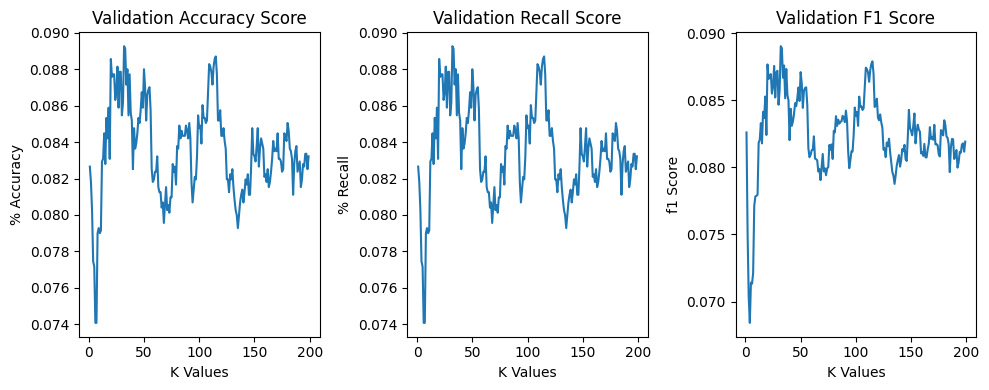

In [15]:
# Visualizing features
fig, (ax1, ax2, ax3)= plt.subplots(nrows=1, ncols=3, figsize= (10,4))
sns.lineplot(x= range(1,200), y= acc_scores, ax= ax1).\
            set(title= "Validation Accuracy Score", xlabel= "K Values", ylabel= "% Accuracy")

sns.lineplot(x= range(1,200), y= recall, ax= ax2).\
            set(title= "Validation Recall Score", xlabel= "K Values", ylabel= "% Recall")

sns.lineplot(x= range(1,200), y= f1, ax= ax3).\
            set(title= "Validation F1 Score", xlabel= "K Values", ylabel= "f1 Score")

fig.tight_layout()

#### Genrate classification report for other metrics and best-case k value

              precision    recall  f1-score   support

   capricorn       0.07      0.08      0.08       803
    aquarius       0.08      0.12      0.10       837
      pisces       0.08      0.09      0.08       849
       aries       0.08      0.08      0.08       905
      taurus       0.10      0.09      0.10       940
      gemini       0.08      0.08      0.08       930
      cancer       0.10      0.13      0.12       920
         leo       0.09      0.09      0.09       963
       virgo       0.08      0.07      0.07       871
       libra       0.09      0.08      0.09       918
     scorpio       0.09      0.07      0.07       903
 sagittarius       0.07      0.04      0.06       832

    accuracy                           0.09     10671
   macro avg       0.08      0.08      0.08     10671
weighted avg       0.08      0.09      0.08     10671



[Text(0.5, 1.0, 'Confusion Matrix- kNN Classifier'),
 Text(0.5, 14.722222222222216, 'Predicted'),
 Text(45.72222222222221, 0.5, 'Actual')]

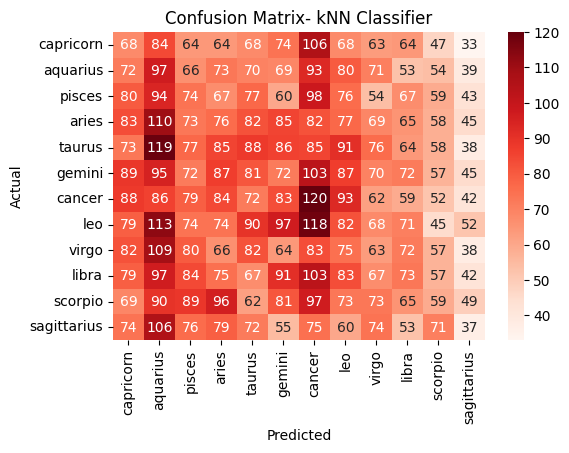

In [16]:
# Split data: Fix the random state to get the same results during re-run
training_data, test_data, training_labels, test_labels= train_test_split(X,\
                                                data_labels, test_size=0.3, random_state= 42)

# apply min-max scaling transformation to data
min_max_scaler = MinMaxScaler()
X_train_scaled= min_max_scaler.fit_transform(training_data)
X_test_scaled= min_max_scaler.transform(test_data)

# generate report using most accurate k value
classifier= KNeighborsClassifier(n_neighbors= best_k)
classifier.fit(X_train_scaled, training_labels)
pred= classifier.predict(X_test_scaled)

print(sk.metrics.classification_report(test_labels, pred, target_names= sign_map.keys()))

c_matrix= sk.metrics.confusion_matrix(test_labels, pred)
plt.figure(figsize=(6,4))
sns.heatmap(c_matrix, annot= True, fmt='d', cmap='Reds',
            xticklabels= sign_map.keys(),
            yticklabels= sign_map.keys()
           ).set(title= "Confusion Matrix- kNN Classifier", xlabel= "Predicted", ylabel= "Actual")

**Conclusion using the k-NN:** The above results indicate poor performance by the K-Nearest-Neighbour classifier, as a random guess at a person's zodiac sign will be correct 1/12th of the time. Using the elbow plot above, our classifier's optimal K value still provided us with an accuracy that *barely* ourperformed a random guess.

- - - - 

### 4b. Predicting Users' Gender (`Sex`) Using Their `Education` and `Income`
---
In this section, we'll be looking to implement a Support Vector Machine model to predict users' `sex` (M/F) using their `education` level and `income`.

**Support Vector Machines (SVM)** offer a robust and flexible approach for binary classification tasks like predicting gender based on `education` and `income`. With their ability to model complex, non-linear relationships and robustness to overfitting.

**Naive Bayes Classifier** is a popular supervised machine learning algorithm based on Bayes' Theorem, primarily used for classification tasks. It is known for its simplicity, speed, and effectiveness, especially in high-dimensional datasets.

**Random Forests** (majority voting amongst **Decision Trees**) may outperform Naive Bayes in scenarios where feature interactions and non-linear relationships are present.

**Logistic Regression:** Logistic regression is an extension of linear regression where we use a logit link function to perform binary classification. They work well with linearly separable data.

Overall, we can achieve high performance on the dataset, provided that:

**Proper Preprocessing** is conducted, including feature scaling and appropriate encoding of categorical variables.\
**Hyperparameters** are tuned effectively to capture the underlying patterns in the data.\
**Model Evaluation** is thorough, considering multiple performance metrics to ensure balanced and reliable predictions.

In [17]:
# preprocess data subset  
feature_data_2= profiles[['education_code', 'income', 'sex']]

print(f"Percentage Null Data:\n{feature_data_2[['education_code','income', 'sex']].isnull().sum()/profiles.shape[0]}", end='\n')
print(f"\nPercentage Misleading income data (i.e.'-1'): {(feature_data_2[feature_data_2.income== -1].income.count()/profiles.shape[0]):.2%}")

Percentage Null Data:
education_code    0.110566
income            0.000000
sex               0.000000
dtype: float64

Percentage Misleading income data (i.e.'-1'): 80.81%


**Approach:**
- Given only ~11% of `education` data is missing (i.e. 'na'), we can drop those records and avoid guessing,
- To avoid dropping ~80% of available data, we have assumed the median `income` for profiles with misleading `income` data.
- To address the skewness of the `income` distribution, we've also applied a log function 

In [18]:
# fill misleading income data '-1' with median income
feature_data_2.loc[feature_data_2.income== -1, 'income']= feature_data_2[(feature_data_2.income!= -1)].income.median()

# validate income feature fill
print(f"Misleading Income Data: {feature_data_2[(feature_data_2.income== -1)].income.sum()}", end='\n')

# map profile gender to numerical label: (e.g., male: 0 ; female: 1)
feature_data_2['sex']= feature_data_2['sex'].map({'m': 0, 'f':1})

# validate encoded data label
print(f"Encoded Gender Labels: {feature_data_2['sex'].unique()}",end="\n")

# drop null education records
feature_data_2= feature_data_2.dropna()

# validate feature fill
print("\nMissing Data")
display(feature_data_2.isnull().sum())


# split data into features and label
label_2= feature_data_2['sex']
data_2= feature_data_2[['education_code', 'income']]

# address skewness of income distribution
data_2['income_log']= np.log(feature_data_2.income +1)

data_2.drop(columns= 'income', inplace=True)

# validate x and y sizes
print(f"Feature and Label counts: {data_2.shape, label_2.shape}")

Misleading Income Data: 0
Encoded Gender Labels: [0 1]

Missing Data


education_code    0
income            0
sex               0
dtype: int64

Feature and Label counts: ((53318, 2), (53318,))


#### Generate Classification Metrics, Report & Confusion Matrix
**N.B:** This might take a while to run

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.svm import SVC

# create model and select number of iterations to evaluate model by
svm_clf= SVC(kernel='rbf', random_state= 42)
iterations= 5

# compute average [accuracy, f1 and recall] scores across iterations
acc_scores= cross_val_score(svm_clf, data_2, label_2, cv= iterations)
f1_scores= cross_val_score(svm_clf, data_2, label_2, cv= 2, scoring='f1_weighted')
recall_scores= cross_val_score(svm_clf, data_2, label_2, cv= 2, scoring='recall_weighted')

print(f"Average Performance Evaluation:")
print(f"Average Model Accuracy Across {iterations} Iterations: {np.average(acc_scores).round(4)}+/-{np.std(acc_scores)}")
print(f"Average f1_score: {np.average(f1_scores).round(4)}+/-{np.std(f1_scores)}")
print(f"Average Recall score: {np.average(recall_scores).round(4)}+/-{np.std(recall_scores)}")

In [ ]:
# split data
X_train, X_test, y_train, y_test= train_test_split(data_2, label_2, test_size= 0.3, random_state= 42)

# scale and transform training data
scaler= StandardScaler()
income_log= scaler.fit_transform(X_train[['income_log']])
X_train= np.hstack((X_train[['education_code']].values, income_log))

# transform test data
X_test= np.hstack((X_test[['education_code']].values, scaler.transform(X_test[['income_log']])))

# train model
svm_clf.fit(X_train,y_train)

# make predictions to assess confusion matrix
y_pred= svm_clf.predict(X_test)

# generate classification report
print("SVM Classification Report:")
print(sk.metrics.classification_report(y_test, y_pred, target_names= label_2.map({0: 'm', 1: 'f'}).unique()))

# generate and plot confusion matrix
c_matrix= sk.metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(c_matrix, annot= True, fmt='d', cmap='Blues',
            xticklabels= label_2.map({0: 'm', 1: 'f'}).unique(),
            yticklabels= label_2.map({0: 'm', 1: 'f'}).unique()
           ).set(title= "Confusion Matrix- SVM Classifier", xlabel= "Predicted", ylabel= "Actual")

A look at the `classification_report` and `confusion_matrix` shows the model does marginally-average in predicting the `male` gender, but performs horribly at predicting the `female` gender.\
We'll look to imporve some aspects of feature engineering and compare results to a Naive Bayes and Random Forest algorithm.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# call Naive Bayes Classifier and fit with data
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)

# make predictions to assess accuracy
y_pred= nb_clf.predict(X_test)

# generate confusion matrix
c_matrix= sk.metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(c_matrix, annot= True, fmt='d', cmap='Reds',
            xticklabels= label_2.map({0: 'm', 1: 'f'}).unique(),
            yticklabels= label_2.map({0: 'm', 1: 'f'}).unique()
           ).set(title= "Confusion Matrix- Gaussian Naive Bayes", xlabel= "Predicted", ylabel= "Actual")

print(sk.metrics.classification_report(y_test, y_pred, target_names= label_2.map({0: 'm', 1: 'f'}).unique()))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# call random forest classifier and fit with train data
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# make predictions to assess accuracy
y_pred_rf = rf_clf.predict(X_test)

# generate confusion matrix
c_matrix= sk.metrics.confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(c_matrix, annot= True, fmt='d', cmap='Reds',
            xticklabels= label_2.map({0: 'm', 1: 'f'}).unique(),
            yticklabels= label_2.map({0: 'm', 1: 'f'}).unique()
           ).set(title= "Confusion Matrix- Random Forest Classifier", xlabel= "Predicted", ylabel= "Actual")

print(sk.metrics.classification_report(y_test, y_pred_rf, target_names= label_2.map({0: 'm', 1: 'f'}).unique()))

In [ ]:
from sklearn.linear_model import LogisticRegression

# call logistic regressor and fit with train data
lr= LogisticRegression()
lr.fit(X_train, y_train)

# make predictions and score
y_pred_lr= lr.predict(X_test)


print("Model Classification Report:")
print(sk.metrics.classification_report(y_test, y_pred_lr, target_names= label_2.map({0: 'm', 1: 'f'}).unique()))

# generate and plot confusion matrix
c_matrix= sk.metrics.confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(c_matrix, annot= True, fmt='d', cmap='Reds',
            xticklabels= label_2.map({0: 'm', 1: 'f'}).unique(),
            yticklabels= label_2.map({0: 'm', 1: 'f'}).unique()
           ).set(title= "Confusion Matrix- Logistic Regssion", xlabel= "Predicted", ylabel= "Actual")

**Conclusion:** In comparing the four (4) models, they all perform within the 52% - 59% accuracy range, but struggle in accurately predicting the 'female' gender.

The *Random Forest* classifer and is the most precise of the four at predicting the 'male' and 'female' classes, but suffers in both `Recall` and `F1-Score` metrics. This means the model suffers when trying to accurately predict the 'female' class: very few `True Positive` predictions. This shortcoming is even worse with the `Support Vector` classifier (No `True Positive` prediction for the 'female' class).

Whilst the *Gaussian Naive Bayes* classifier was the least accurate and was middle-of-the-pack in precision, it did a lot better than other models in overall recall and F1 scores when predicting the 'female' class, albeit at the expense of accurately predicting the 'male' gender.